<a href="https://colab.research.google.com/github/srigouri/Data-Science-Dissertation/blob/main/BreastCancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split,cross_val_score,KFold 
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,VotingClassifier
from sklearn.metrics import f1_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import make_scorer,accuracy_score, recall_score, precision_score, plot_roc_curve
import seaborn as sns 


In [156]:
cancer_data = pd.read_csv("https://raw.githubusercontent.com/srigouri/Data-Science-Dissertation/main/data%20(1).csv")
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [157]:
cancer_data.drop('id',axis=1,inplace=True)
cancer_data.drop('Unnamed: 32',axis=1,inplace=True)

In [158]:
cancer_data['diagnosis'] = cancer_data['diagnosis'].map({'M':1,'B':0})


In [159]:
diagnosis=cancer_data.diagnosis;

In [160]:
X = cancer_data.drop('diagnosis' ,axis = 1 )
Y = pd.DataFrame(cancer_data.diagnosis).values.ravel()

## Splitting data into 80% being used for training the model, and 20% for testing:

In [161]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42 , stratify = Y)


In [162]:
X_train.shape,Y_train.shape


((455, 30), (455,))

In [163]:
Y_test.mean()

0.3684210526315789

## Standardizing the input features

In [164]:
SC = StandardScaler()
train_scaled_X = SC.fit_transform(X_train)
test_scaled_X = SC.transform(X_test)

In [165]:
train_scaled_X

array([[ 0.51855873,  0.89182579,  0.4246317 , ..., -0.23574392,
         0.05456632,  0.02183673],
       [-0.51636409, -1.63971029, -0.54134872, ..., -0.32320788,
        -0.13757624, -0.90440164],
       [-0.36811839,  0.45551496, -0.38824993, ..., -0.89082504,
        -0.675893  , -0.14401559],
       ...,
       [-0.32616206,  1.33280304, -0.38905998, ..., -0.84289958,
        -0.96490082, -1.16888375],
       [ 0.00948859,  0.25952507,  0.00786279, ...,  0.27571059,
        -0.60284707, -0.30545988],
       [ 0.80945595,  0.36918608,  0.79320285, ...,  1.00657384,
        -0.46151907, -0.44817001]])

## Dimensionality Reduction using Principal Component Analysis

In [166]:
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(train_scaled_X)
X_test_pca=pca.transform(test_scaled_X)

In [167]:
print(pca.explained_variance_ratio_)

[0.44593522 0.18545255]


## Random Forest Classifier

In [168]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train_pca,Y_train)

prediction1 = randomforest.predict(X_test_pca)
print ("Accuracy =", metrics.accuracy_score(prediction1,Y_test))

Accuracy = 0.9473684210526315


In [169]:
print("For random forest:")
rfscores = cross_val_score(randomforest, X, Y,cv=5,scoring='accuracy')
print(rfscores)
print(rfscores.mean())

For random forest:
[0.92105263 0.94736842 0.99122807 0.97368421 0.95575221]
0.9578171091445427


In [170]:
rf_predict = randomforest.fit(X_train_pca, Y_train).predict(X_test_pca)

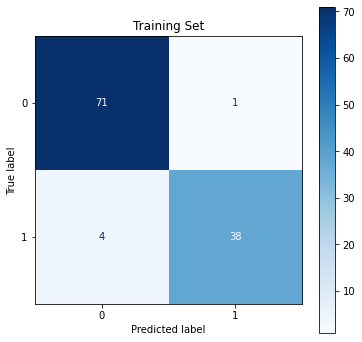

In [171]:
conf_mat_rf = ConfusionMatrixDisplay(confusion_matrix(Y_test, rf_predict))
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Training Set')
conf_mat_rf.plot(cmap=plt.cm.Blues, ax=ax);

In [172]:
print(f'Accuracy: {accuracy_score(Y_test, rf_predict)}\nPrecision: {precision_score(Y_test, rf_predict)}\nRecall: {recall_score(Y_test, rf_predict)}\nF-Score: {f1_score(Y_test,rf_predict)}')

Accuracy: 0.956140350877193
Precision: 0.9743589743589743
Recall: 0.9047619047619048
F-Score: 0.9382716049382716


## K-Nearest Neighbor Classifier



In [173]:
KNN = KNeighborsClassifier()
KNN.fit(X_train_pca,Y_train)

prediction1 = KNN.predict(X_test_pca)
print ("Accuracy =", metrics.accuracy_score(prediction1,Y_test))

Accuracy = 0.9473684210526315


In [174]:
print("For K-Nearest Neighbors:")
knnscores = cross_val_score(KNN, X, Y,cv=5,scoring='accuracy')
print(knnscores)
print(knnscores.mean())

For K-Nearest Neighbors:
[0.88596491 0.93859649 0.93859649 0.94736842 0.92920354]
0.9279459711224964


In [175]:
knn_predict =KNN.fit(X_train_pca, Y_train).predict(X_test_pca)


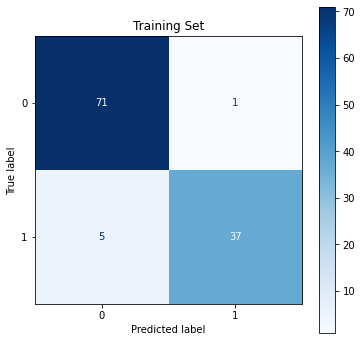

In [176]:
conf_mat_knn = ConfusionMatrixDisplay(confusion_matrix(Y_test, knn_predict))
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Training Set')
conf_mat_knn.plot(cmap=plt.cm.Blues, ax=ax);

In [177]:
print(f'Accuracy: {accuracy_score(Y_test, knn_predict)}\nPrecision: {precision_score(Y_test, knn_predict)}\nRecall: {recall_score(Y_test, knn_predict)}\nF-Score: {f1_score(Y_test,knn_predict)}')

Accuracy: 0.9473684210526315
Precision: 0.9736842105263158
Recall: 0.8809523809523809
F-Score: 0.925


## Support Vector Classifier (SVC)

In [178]:
supportvector = SVC(probability=True)
supportvector.fit(X_train_pca,Y_train)

prediction2 = supportvector.predict(X_test_pca)
print ("Accuracy =", metrics.accuracy_score(prediction2,Y_test))

Accuracy = 0.9298245614035088


In [179]:
print("For Support Vector:")
svscores = cross_val_score(supportvector, X, Y,cv=5,scoring='accuracy')
print(svscores)
print(svscores.mean())

For Support Vector:
[0.85087719 0.89473684 0.92982456 0.94736842 0.9380531 ]
0.9121720229777983


In [180]:
svc_predict = supportvector.fit(X_train_pca, Y_train).predict(X_test_pca)


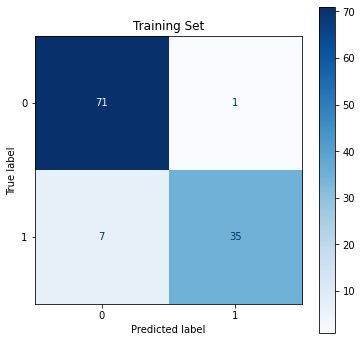

In [181]:
conf_mat_svc = ConfusionMatrixDisplay(confusion_matrix(Y_test, svc_predict))
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Training Set')
conf_mat_svc.plot(cmap=plt.cm.Blues, ax=ax);

In [182]:
print(f'Accuracy: {accuracy_score(Y_test, svc_predict)}\nPrecision: {precision_score(Y_test, svc_predict)}\nRecall: {recall_score(Y_test, svc_predict)}\nF-Score: {f1_score(Y_test,svc_predict)}')

Accuracy: 0.9298245614035088
Precision: 0.9722222222222222
Recall: 0.8333333333333334
F-Score: 0.8974358974358975


## Logistic Regression

In [183]:
Logistic_reg = LogisticRegression(solver='liblinear', max_iter=100)
Logistic_reg.fit(X_train_pca,Y_train)

prediction3 = Logistic_reg.predict(X_test_pca)
print ("Accuracy =", metrics.accuracy_score(prediction3,Y_test))

Accuracy = 0.9473684210526315


In [184]:
print("For Logistic Regression:")
lrscores = cross_val_score(Logistic_reg, X, Y,cv=5,scoring='accuracy')
print(lrscores)
print(lrscores.mean())

For Logistic Regression:
[0.93859649 0.93859649 0.97368421 0.94736842 0.96460177]
0.9525694767893185


In [185]:
lr_predict = Logistic_reg.fit(X_train_pca, Y_train).predict(X_test_pca)


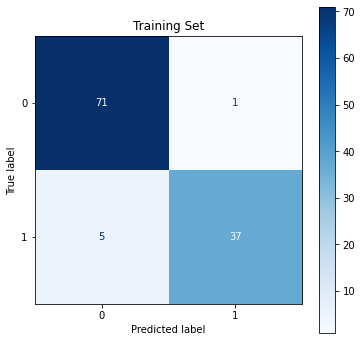

In [186]:
conf_mat_lr = ConfusionMatrixDisplay(confusion_matrix(Y_test, lr_predict))
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Training Set')
conf_mat_lr.plot(cmap=plt.cm.Blues, ax=ax);

In [187]:
print(f'Accuracy: {accuracy_score(Y_test, lr_predict)}\nPrecision: {precision_score(Y_test, lr_predict)}\nRecall: {recall_score(Y_test, lr_predict)}\nF-Score: {f1_score(Y_test,lr_predict)}')

Accuracy: 0.9473684210526315
Precision: 0.9736842105263158
Recall: 0.8809523809523809
F-Score: 0.925


## Naive Bayes Classifier

In [188]:
Naive_bayes = GaussianNB()
NB = Naive_bayes.fit(X_train_pca,Y_train)

In [189]:
prediction4 = NB.predict(X_test_pca)
print ("Accuracy =", metrics.accuracy_score(prediction4,Y_test))

Accuracy = 0.8859649122807017


In [190]:
print("For Naive Bayes Classifier:")
nbscores = cross_val_score(Naive_bayes, X, Y,cv=5,scoring='accuracy')
print(nbscores)
print(nbscores.mean())

For Naive Bayes Classifier:
[0.92105263 0.92105263 0.94736842 0.94736842 0.95575221]
0.9385188635305075


In [191]:
nb_predict = Naive_bayes.fit(X_train_pca, Y_train).predict(X_test_pca)


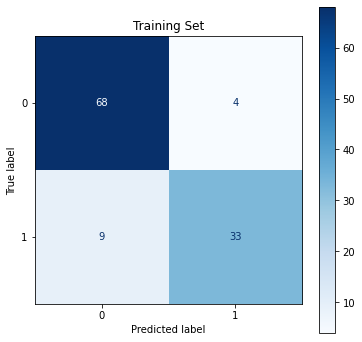

In [192]:
conf_mat_nb = ConfusionMatrixDisplay(confusion_matrix(Y_test, nb_predict))
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Training Set')
conf_mat_nb.plot(cmap=plt.cm.Blues, ax=ax);

In [193]:
print(f'Accuracy: {accuracy_score(Y_test, nb_predict)}\nPrecision: {precision_score(Y_test, nb_predict)}\nRecall: {recall_score(Y_test, nb_predict)}\nF-Score: {f1_score(Y_test,nb_predict)}')

Accuracy: 0.8859649122807017
Precision: 0.8918918918918919
Recall: 0.7857142857142857
F-Score: 0.8354430379746834


## Ensemble Classifier

In [194]:
ensem_Clf = VotingClassifier(estimators = [('rf',randomforest), ('svc',supportvector), ('KNN',KNN), ('LR', Logistic_reg),('NB',Naive_bayes)], voting='soft') 
ensem_Clf.fit(X_train, Y_train)

ensem_Clf_pred = ensem_Clf.predict(X_test)
ensem_Clf_accu = accuracy_score(Y_test, ensem_Clf_pred)
print('Accuracy score of the Voting ensemble model is', ensem_Clf_accu)

Accuracy score of the Voting ensemble model is 0.956140350877193


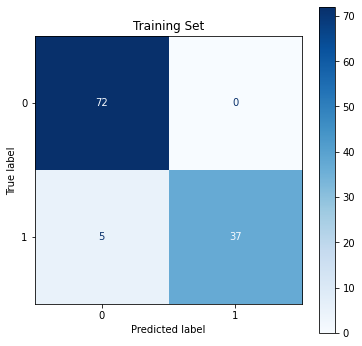

In [195]:
conf_mat_emc = ConfusionMatrixDisplay(confusion_matrix(Y_test, ensem_Clf_pred))
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Training Set')
conf_mat_emc.plot(cmap=plt.cm.Blues, ax=ax);

In [196]:
print(f'Accuracy: {accuracy_score(Y_test, ensem_Clf_pred)}\nPrecision: {precision_score(Y_test, ensem_Clf_pred)}\nRecall: {recall_score(Y_test, ensem_Clf_pred)}\nF-Score: {f1_score(Y_test,ensem_Clf_pred)}')

Accuracy: 0.956140350877193
Precision: 1.0
Recall: 0.8809523809523809
F-Score: 0.9367088607594937


In [197]:
models = [
    ("Logistic Regression", LogisticRegression()),
    ("KNN", KNeighborsClassifier()),
    ("Naive Bayesian", GaussianNB()),
    ("Support Vector Machine", SVC()),
    ("Random Forest", RandomForestClassifier()),
    ("Ensemble Classifier",VotingClassifier(estimators = [('rf',randomforest), ('svc',supportvector), ('KNN',KNN), ('LR', Logistic_reg),('NB',Naive_bayes)], voting='soft'))]

names = []
cv_mean = []
cv_std = []
scoring = "accuracy"
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train_pca, Y_train, cv=kfold, scoring=scoring)
    names.append(name)
    cv_mean.append(cv_results.mean())
    cv_std.append(cv_results.std())

model_results = pd.DataFrame(list(zip(names, cv_mean, cv_std)), columns=['model', 'accuracy', 'stdev'])
model_results.round(3)

,model,accuracy,stdev
0,Logistic Regression,0.947,0.030
1,KNN,0.936,0.023
2,Naive Bayesian,0.916,0.026
3,Support Vector Machine,0.932,0.044
4,Random Forest,0.936,0.040
5,Ensemble Classifier,0.936,0.036
